### Class 6- Starter code


In [108]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics
%pylab inline
import seaborn

Populating the interactive namespace from numpy and matplotlib


### Create sample data and fit a model

In [96]:
# np.random.seed(10)

df = pd.DataFrame({'x': range(100), 'y': range(100)})
# NOTE: Whenever you make changes to dataframes and want to keep the original
# make sure you do a deep copy
biased_df  = df.copy(deep=True) 
biased_df.loc[:20, 'x'] = 1 # create a bias with both columns

def append_jitter(series):
    # adds uniform random variable to the input series
    jitter = np.random.random_sample(size=series.shape[0])
    return series + jitter

df['x'] = append_jitter(df.x)
df['y'] = append_jitter(df.y)

biased_df['x'] = append_jitter(biased_df.x)
biased_df['y'] = append_jitter(biased_df.y)


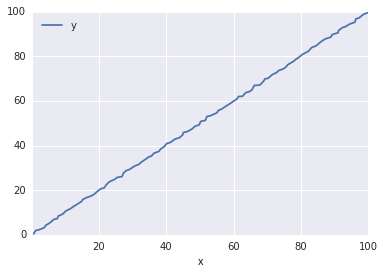

In [97]:
df.plot(x='x',y='y')

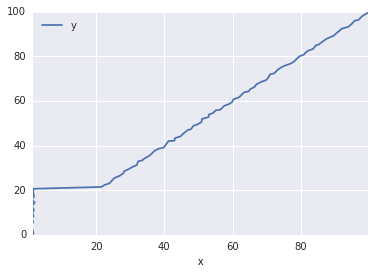

In [98]:
biased_df.plot(x='x',y='y')

In [99]:
## fit
lm = linear_model.LinearRegression().fit(df[['x']], df[['y']])
print metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))


0.145718092177


In [109]:
## biased fit
lm_biased = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
print metrics.mean_squared_error(biased_df['y'], lm_biased.predict(biased_df[['x']]))

13.4367195592


### Question - Try to plot out the best fit line based on the model prediction using the input X vector. You can use lmplot from seaborn

In [110]:
# Plot out the prediction. use lm.predict and pass in the X dataframe

## Question - try to look at the distribution of the residuals for both biased_df and df

In [103]:
# Hint: You can use the kind=density plot in matplotlib to do this.
# Do a plot for biased_df and df. Remember that residual is the actual y - predicted y


## Cross validation
#### Intro to cross validation with bike share data from last time. We will be modeling casual ridership. 

In [111]:
from sklearn import cross_validation
wd = '../../assets/dataset/'
bikeshare = pd.read_csv(wd + 'bikeshare.csv')

#### Create dummy variables and set outcome (dependent) variable

In [112]:
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = pd.DataFrame(bikeshare.casual)

In [113]:
modeldata.head()

,temp,hum,weather_1,weather_2,weather_3
0,0.24,0.81,1,0,0
1,0.22,0.80,1,0,0
2,0.22,0.80,1,0,0
3,0.24,0.75,1,0,0
4,0.24,0.75,1,0,0


#### Create a cross valiation with 5 folds

In [114]:
kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)
modeldata.shape

(17379, 5)

In [115]:
# kf basically contains 5 different test train sets of 80% and 20% split
for a in kf:
    print a
    print a[0].shape , a[1].shape

(array([    0,     2,     3, ..., 17376, 17377, 17378]), array([    1,     9,    10, ..., 17365, 17367, 17371]))
(13903,) (3476,)
(array([    0,     1,     2, ..., 17374, 17377, 17378]), array([    7,    16,    18, ..., 17370, 17375, 17376]))
(13903,) (3476,)
(array([    0,     1,     2, ..., 17376, 17377, 17378]), array([   15,    17,    27, ..., 17353, 17359, 17369]))
(13903,) (3476,)
(array([    0,     1,     2, ..., 17376, 17377, 17378]), array([    3,     5,    14, ..., 17364, 17372, 17373]))
(13903,) (3476,)
(array([    1,     3,     5, ..., 17373, 17375, 17376]), array([    0,     2,     4, ..., 17374, 17377, 17378]))
(13904,) (3475,)


In [117]:
mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for a in kf:
    train_index = a[0] 
    test_index = a[1]
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    scores.append(lm.score(modeldata.iloc[test_index], y.iloc[test_index]))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 1586.82839854
R2: 0.322841669304
Model 2
MSE: 1801.20979511
R2: 0.306381935243
Model 3
MSE: 1587.01185628
R2: 0.313312087434
Model 4
MSE: 1661.17162676
R2: 0.295861271177
Model 5
MSE: 1732.39561124
R2: 0.318655854032
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 1673.72345759
Mean of R2 for all folds: 0.311410563438


In [118]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print "~~~~ Single Model ~~~~"
print 'MSE of single model:', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'R2: ', lm.score(modeldata, y)

~~~~ Single Model ~~~~
MSE of single model: 1672.58110765
R2:  0.311934605989


### Check
While the cross validated approach here generated more overall error, which of the two approaches would predict new data more accurately: the single model or the cross validated, averaged one? Why?


Answer: 

### There are ways to improve our model with regularization. 
Let's check out the effects on MSE and R2

In [121]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print "~~~ OLS ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'OLS R2:', lm.score(modeldata, y)
print lm.coef_

lm = linear_model.Lasso().fit(modeldata, y)
print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Lasso R2:', lm.score(modeldata, y)
print lm.coef_

lm = linear_model.Ridge().fit(modeldata, y)
print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Ridge R2:', lm.score(modeldata, y)
print lm.coef_


~~~ OLS ~~~
OLS MSE:  1672.58110765
OLS R2: 0.311934605989
[[ 112.68901765  -84.01121684  -24.68489063  -21.00314494  -21.71893628]]
~~~ Lasso ~~~
Lasso MSE:  1725.41581608
Lasso R2: 0.290199495922
[ 86.81079432 -55.76414394   0.          -0.          -0.        ]
~~~ Ridge ~~~
Ridge MSE:  1672.60490113
Ridge R2: 0.311924817843
[[ 112.50129738  -83.84805622  -13.38214934   -9.72671278  -10.46162477]]


### Figuring out the alphas can be done by "hand"

In [122]:
alphas = np.logspace(-10, 10, 21)
mse =[]
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Lasso(alpha=a)
    lm.fit(modeldata, y)
    print lm.coef_
    mse.append(metrics.mean_squared_error(y, lm.predict(modeldata)))
    print metrics.mean_squared_error(y, lm.predict(modeldata))
    print  lm.score(modeldata, y)

Alpha: 1e-10
[ 112.67353849  -83.99400867  -14.13184385  -10.45474561  -11.1736308 ]
1672.60030785
0.311926707425
Alpha: 1e-09
[ 112.67353845  -83.99400863  -14.13183603  -10.45473779  -11.17362296]
1672.60030788
0.311926707413
Alpha: 1e-08
[ 112.67353812  -83.99400832  -14.13175774  -10.45465952  -11.17354466]
1672.60030816
0.311926707296
Alpha: 1e-07
[ 112.67353477  -83.99400521  -14.13097487  -10.4538768   -11.17276161]
1672.60031101
0.311926706124
Alpha: 1e-06
[ 112.67350128  -83.99397405  -14.12314614  -10.4460497   -11.16493108]
1672.60033951
0.3119266944
Alpha: 1e-05
[ 112.67316634  -83.9936625   -14.04485887  -10.36777861  -11.08662579]
1672.60062569
0.311926576673
Alpha: 0.0001
[ 112.66981758  -83.99054765  -13.26239352   -9.58547483  -10.30397994]
1672.60360255
0.311925352052
Alpha: 0.001
[ 112.63635975  -83.9594323    -5.45806601   -1.78275411   -2.49783247]
1672.64489673
0.311908364477
Alpha: 0.01
[ 112.39077334  -83.66325507   -2.90812399    0.66752444   -0.        ]
1672.

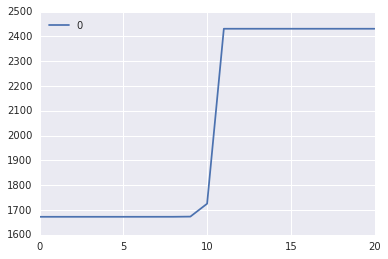

In [123]:
pd.DataFrame(mse).plot()

### Or we can use grid search to make this faster

In [124]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas,'fit_intercept':[True,False],'normalize':[True,False]},
    scoring='r2',cv=5)

gs.fit(modeldata, y)


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

##### Best score 

In [125]:
print gs.best_score_ 

0.202451386997


##### mean squared error here comes in negative, so let's make it positive.

In [126]:
print -gs.best_score_ 

-0.202451386997


##### explains which grid_search setup worked best

In [127]:
gs.best_estimator_

Ridge(alpha=100.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [128]:
gs.best_estimator_.fit(modeldata,y).coef_

array([[ 102.45071437,  -63.30768502,   24.29725529,   24.68464918,
          20.2370095 ]])

In [129]:
print gs.best_estimator_.coef_

[[ 102.45071437  -63.30768502   24.29725529   24.68464918   20.2370095 ]]


##### shows all the grid pairings and their performances.

In [130]:
[x for x in gs.grid_scores_ ]

[mean: 0.16943, std: 0.07741, params: {'normalize': True, 'alpha': 1e-10, 'fit_intercept': True},
 mean: 0.16943, std: 0.07741, params: {'normalize': False, 'alpha': 1e-10, 'fit_intercept': True},
 mean: 0.16873, std: 0.07775, params: {'normalize': True, 'alpha': 1e-10, 'fit_intercept': False},
 mean: 0.16873, std: 0.07775, params: {'normalize': False, 'alpha': 1e-10, 'fit_intercept': False},
 mean: 0.16943, std: 0.07741, params: {'normalize': True, 'alpha': 1.0000000000000001e-09, 'fit_intercept': True},
 mean: 0.16943, std: 0.07741, params: {'normalize': False, 'alpha': 1.0000000000000001e-09, 'fit_intercept': True},
 mean: 0.16873, std: 0.07775, params: {'normalize': True, 'alpha': 1.0000000000000001e-09, 'fit_intercept': False},
 mean: 0.16873, std: 0.07775, params: {'normalize': False, 'alpha': 1.0000000000000001e-09, 'fit_intercept': False},
 mean: 0.16943, std: 0.07741, params: {'normalize': True, 'alpha': 1e-08, 'fit_intercept': True},
 mean: 0.16943, std: 0.07741, params: {'no

# Independent Practice: Bike data revisited

There are tons of ways to approach a regression problem. The regularization techniques appended to ordinary least squares optimizes the size of coefficients to best account for error. Gradient Descent also introduces learning rate (how aggressively do we solve the problem), epsilon (at what point do we say the error margin is acceptable), and iterations (when should we stop no matter what?)

For this deliverable, our goals are to:

- implement the gradient descent/ridge/regression/OLS approach to our bike-share modeling problem,
- demonstrate the grid_search module!



### Try out these questions for yourself
While exploring the Gradient Descent regressor object, you'll build a grid search using the stochastic gradient descent estimator for the bike-share data set. Continue with either the model you evaluated last class or the simpler one from today. In particular, be sure to implement the "param_grid" in the grid search to get answers for the following questions:

- With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
- Based on the data, we know when to properly use l1 vs l2 regularization. By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does that statement hold true? If not, did gradient descent have enough iterations?
- How do these results change when you alter the learning rate (eta0)?

**Bonus**: Can you see the advantages and disadvantages of using gradient descent after finishing this exercise?

### Starter Code

In [135]:
params = {} # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

print 'BEST ESTIMATOR'
# NOTE: Due to a weird design issue(there is an open issue on sklearn about this), MSE is a negative value. I.e. the
# smaller the absolute value, the better the performance.
print -gs.best_score_
print gs.best_estimator_
print 'ALL ESTIMATORS'
print gs.grid_scores_

BEST ESTIMATOR
1688.85978143
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)
ALL ESTIMATORS
[mean: -1688.85978, std: 93.74629, params: {}]


In [134]:
## go for it! Check out other parameters such as "penalty" since that refers to l1 vs l2. Gridsearch on that paramter
## And Others and see which model gives you the best result.

In [36]:
gs.best_estimator_

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

### Bonus : Try to compare SGD Regressor with linear regression in terms of MSE and R^2